# Основные концепции Machine Learning

In [1]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style='whitegrid', context='notebook')
plt.style.use('fivethirtyeight');

In [2]:
data = pd.read_csv('phones.csv')
data.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [3]:
list(data.columns)

['disk', 'os', 'price', 'year']

In [4]:
data.dtypes

disk      int64
os       object
price     int64
year      int64
dtype: object

In [5]:
data['disk'].dtypes

dtype('int64')

In [6]:
not_categorical = []
for el in data.columns:
    if data[el].dtypes != 'object': not_categorical.append(el)
print(not_categorical)

['disk', 'price', 'year']


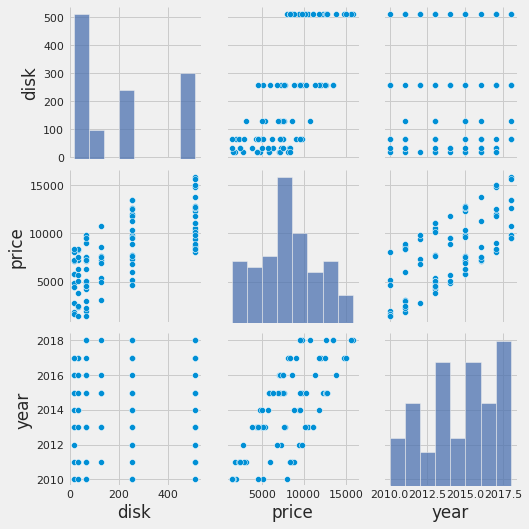

In [7]:
sns.pairplot(data[not_categorical])
plt.show()

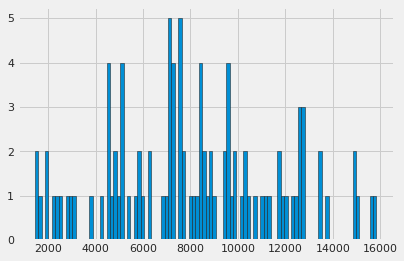

In [8]:
plt.hist(x=data.price.values,  bins=100, edgecolor='k')
plt.show()

Задание 1: обучить модель регрессии

In [9]:
X = data[not_categorical]
y = data.price

In [10]:
regression = LinearRegression().fit(X,y)

In [11]:
mse(y, regression.predict(X))

1.394833307917543e-24

Задание 2: обучить модель классификации

In [12]:
X = data[not_categorical]
y = data.os

In [13]:
classification = DecisionTreeClassifier().fit(X, y)
print(export_text(classification))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



Задание 3: обучить модель кластеризации

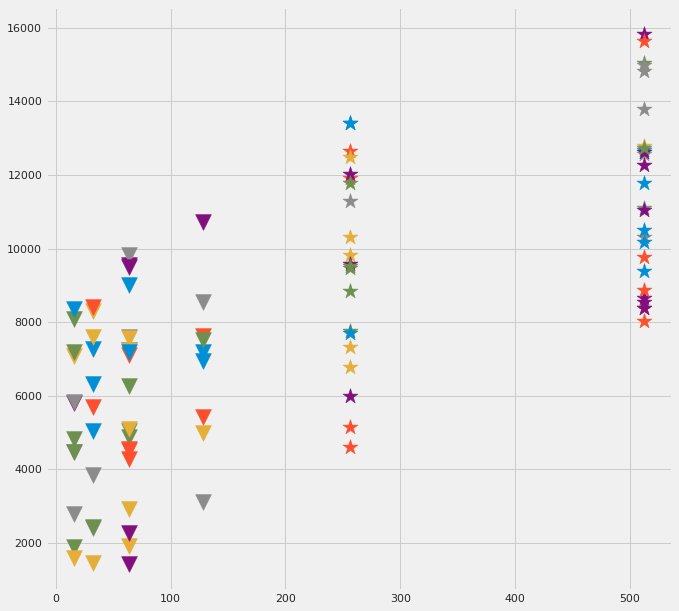

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "v", "iOS": "*"}
for d1, d2, l in zip(data.disk, data.price, data.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [15]:
X = data[data.columns.difference(['os', 'e'])]

In [16]:
clust = KMeans(n_clusters=2).fit(X)

In [17]:
[c1, c2] = clust.cluster_centers_

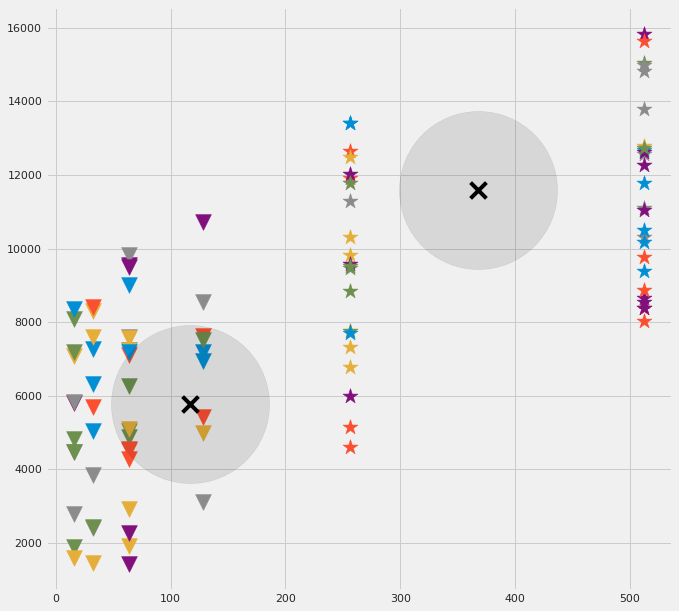

In [18]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "v", "iOS": "*"}
for d1, d2, l in zip( data.disk, data.price, data.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()